# start_pakistan_correlations
## HW_computeCorrelTriggers.ipynb
This script computes correlation between locations based on the yearly triggers, which were already computed using code "HW_calcTriggers.ipynb".

In [50]:
from pathlib import Path
import os
import sys
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.stats import pearsonr
import scipy.spatial.distance
import seaborn as sb

C:\Users\alexa\AppData\Local\Temp\ipykernel_13116\1138325350.py:10: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [3]:
# Set the root path
rootPath = Path('C:/Users/alexa/Documents/02_work/02_start/02_deliv/05_pk_correlation/hw/data')

## Load the triggers by year data

In [4]:
triggerYears = pd.read_csv(rootPath/'city_triggers/triggerYears.csv')

In [5]:
triggerYears.index = triggerYears.year
triggerYears = triggerYears.drop('year',axis=1)

In [6]:
triggerYears

,Jacobabad,Karachi_Jinnah_Airport,Lahore,Multan,Nawabshah,Sibi
year,,,,,,
2004,0.0,0.0,0.0,0.0,0.0,0.0
2005,0.0,1.0,1.0,1.0,0.0,0.0
2006,1.0,0.0,0.0,0.0,0.0,0.0
2007,0.0,1.0,1.0,1.0,0.0,0.0
2008,0.0,0.0,0.0,0.0,0.0,0.0
2009,1.0,0.0,1.0,0.0,0.0,0.0
2010,0.0,0.0,0.0,2.0,0.0,0.0
2011,0.0,0.0,0.0,1.0,0.0,0.0
2012,0.0,0.0,1.0,1.0,0.0,0.0


## Compute correlation of annual triggers for all city pairs

In [7]:
sites=triggerYears.columns.to_list()

In [8]:
# Create sitePairs
sites1=[]
sites2=[]
for i, site in enumerate(sites):
    sites1.append([site]*len(sites))
    sites2.append(sites)
sites1 = [item for sublist in sites1 for item in sublist]
sites2 = [item for sublist in sites2 for item in sublist]

In [11]:
# Loop through sites, for each, compute and record the correlation - use monitoring months only
correlsData=pd.DataFrame(data=[], index=['site1','site2','correlSubsetMonths']).T
correlsResultData=pd.DataFrame(data=[], index=['site1','site2','pearsonSubsetMonths','pSubsetMonths']).T

for i in range(0, len(sites1)):
    
    # Get data for both sites
    site1=triggerYears[sites1[i]]
    site2=triggerYears[sites2[i]]
    
    # Compute correlation    
    correl=site1.corr(site2)
    correlResult = list(pearsonr(site1, site2)) # (Pearson's correlation coefficient, 2-tailed p-value)
    
    # Record in dataframe
    correlData = pd.DataFrame(data=[sites1[i], sites2[i], correl], index=correlsData.columns).T
    correlsData = pd.concat(objs=[correlsData, correlData])
    
    correlResultData  = pd.DataFrame(data=[sites1[i], sites2[i]] + correlResult, index=correlsResultData.columns).T
    correlsResultData = pd.concat(objs=[correlsResultData, correlResultData])

In [12]:
# Pivot to create a matrix
correlsMatrix=correlsData.pivot(index='site1', columns='site2', values='correlSubsetMonths')
correlsMatrix

site2,Jacobabad,Karachi_Jinnah_Airport,Lahore,Multan,Nawabshah,Sibi
site1,,,,,,
Jacobabad,1.0,0.548853,-0.015717,0.221924,0.817758,0.456435
Karachi_Jinnah_Airport,0.548853,1.0,-0.018744,0.121442,0.313468,0.426805
Lahore,-0.015717,-0.018744,1.0,-0.019427,0.161581,0.238176
Multan,0.221924,0.121442,-0.019427,1.0,0.383682,0.271827
Nawabshah,0.817758,0.313468,0.161581,0.383682,1.0,0.517985
Sibi,0.456435,0.426805,0.238176,0.271827,0.517985,1.0


In [13]:
# Write out as csv
outPath = rootPath/'correlation'
outPath.mkdir(exist_ok=True)
correlsMatrix.to_csv(outPath/'correlsMatrixYearlyTriggers.csv')

### Check statistical significance of the correlations
All the p-values are essentially zero, so high statistical significance. This is because we are using several thousand data points in each series where correlaiton is computed.

In [17]:
# Pivot to create a matrix
correlsResultsMatrix=correlsResultData.pivot(index='site1', columns='site2', values='pSubsetMonths')
correlsResultsMatrix.to_csv(outPath/'correlsMatrixYearlyTriggersPValue.csv')
correlsResultsMatrix

site2,Jacobabad,Karachi_Jinnah_Airport,Lahore,Multan,Nawabshah,Sibi
site1,,,,,,
Jacobabad,0.0,0.014949,0.949079,0.361173,0.000019,0.049489
Karachi_Jinnah_Airport,0.014949,0.0,0.93929,0.620419,0.191265,0.068391
Lahore,0.949079,0.93929,0.0,0.937081,0.508701,0.326134
Multan,0.361173,0.620419,0.937081,0.0,0.104876,0.260255
Nawabshah,0.000019,0.191265,0.508701,0.104876,0.0,0.0231
Sibi,0.049489,0.068391,0.326134,0.260255,0.0231,0.0


### Note
These are Pearson r correlaiton values. Can get the coefficient of determination by squaring (i.e., r-squared)

## Repeat, with maximum 1 activation per site per year

In [18]:
# Loop through sites, for each, compute and record the correlation - use monitoring months only
correlsData=pd.DataFrame(data=[], index=['site1','site2','correlSubsetMonths']).T
correlsResultData=pd.DataFrame(data=[], index=['site1','site2','pearsonSubsetMonths','pSubsetMonths']).T

for i in range(0, len(sites1)):
    
    # Get data for both sites
    site1=triggerYears[sites1[i]]
    site2=triggerYears[sites2[i]]
    site1[site1>1]=1
    site2[site2>1]=1
    
    # Compute correlation    
    correl=site1.corr(site2)
    correlResult = list(pearsonr(site1, site2)) # (Pearson's correlation coefficient, 2-tailed p-value)
    
    # Record in dataframe
    correlData = pd.DataFrame(data=[sites1[i], sites2[i], correl], index=correlsData.columns).T
    correlsData = pd.concat(objs=[correlsData, correlData])
    
    correlResultData  = pd.DataFrame(data=[sites1[i], sites2[i]] + correlResult, index=correlsResultData.columns).T
    correlsResultData = pd.concat(objs=[correlsResultData, correlResultData])

In [19]:
# Pivot to create a matrix
correlsMatrix=correlsData.pivot(index='site1', columns='site2', values='correlSubsetMonths')
correlsMatrix

site2,Jacobabad,Karachi_Jinnah_Airport,Lahore,Multan,Nawabshah,Sibi
site1,,,,,,
Jacobabad,1.0,0.155556,-0.055556,-0.155556,0.489345,0.47194
Karachi_Jinnah_Airport,0.155556,1.0,0.155556,0.055556,0.035806,0.47194
Lahore,-0.055556,0.155556,1.0,0.055556,0.035806,-0.16855
Multan,-0.155556,0.055556,0.055556,1.0,0.190964,0.16855
Nawabshah,0.489345,0.035806,0.035806,0.190964,1.0,0.567295
Sibi,0.47194,0.47194,-0.16855,0.16855,0.567295,1.0


In [20]:
# Write out as csv
outPath = rootPath/'correlation'
outPath.mkdir(exist_ok=True)
correlsMatrix.to_csv(outPath/'correlsMatrixYearlyTriggersMax1.csv')

In [21]:
# Pivot to create a matrix
correlsResultsMatrix=correlsResultData.pivot(index='site1', columns='site2', values='pSubsetMonths')
correlsResultsMatrix.to_csv(outPath/'correlsMatrixYearlyTriggersMax1PValue.csv')
correlsResultsMatrix

site2,Jacobabad,Karachi_Jinnah_Airport,Lahore,Multan,Nawabshah,Sibi
site1,,,,,,
Jacobabad,0.0,0.524836,0.821283,0.524836,0.033469,0.041342
Karachi_Jinnah_Airport,0.524836,0.0,0.524836,0.821283,0.884297,0.041342
Lahore,0.821283,0.524836,0.0,0.821283,0.884297,0.490336
Multan,0.524836,0.821283,0.821283,0.0,0.433551,0.490336
Nawabshah,0.033469,0.884297,0.884297,0.433551,0.0,0.011304
Sibi,0.041342,0.041342,0.490336,0.490336,0.011304,0.0


## Scatter plots
Plot a scatter plot for a site pair to illustrate the four possible combinations and the linear dependence relationship visually

In [115]:
colors=[
(68/255,84/255,106/255),    
(254/255,106/255,70/255), 
(133/255,239/255,205/255),
(255/255,192/255,0/255),    
(165/255,165/255,165/255), 
(255/255,193/255,179/255), 
(184/255,193/255,218/255),    
(24/255,186/255,134/255)
]

In [81]:
sitesDF=pd.DataFrame(data=[sites1,sites2],index=['site1','site2']).T
sitesDF=sitesDF.drop_duplicates()
dropRows=[6,12,13,18,19,20,24,25,26,27,30,31,32,33,34]
sitesDF=sitesDF.drop(dropRows).reset_index()
sitesDF=sitesDF.drop('index',axis=1)

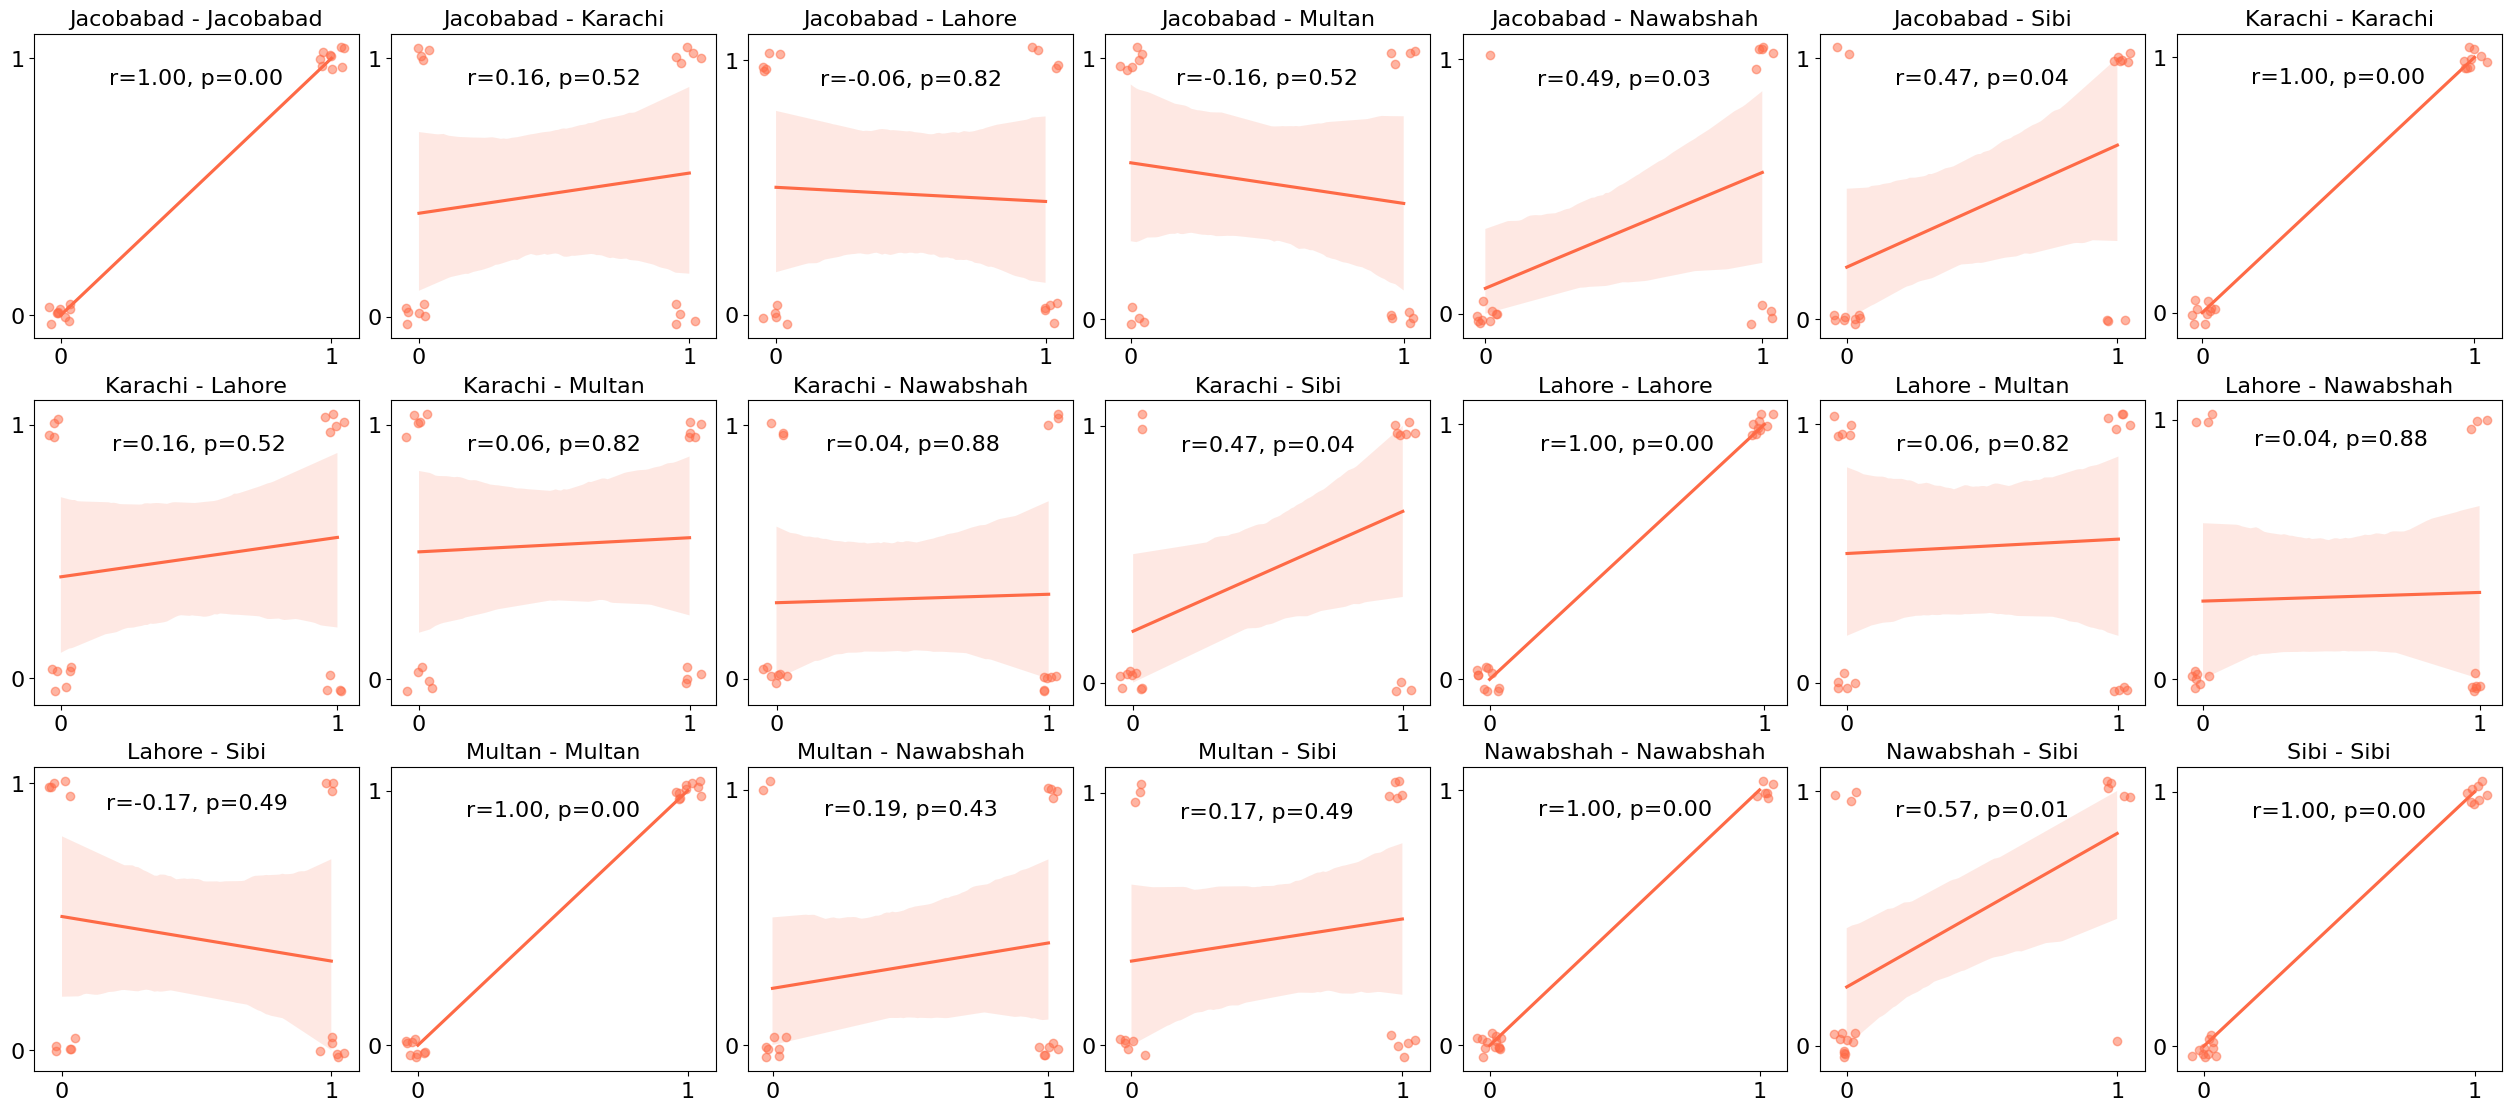

In [118]:
# 15/21 subplots, each is a site-pair (6x6 in total)
fig, axes = plt.subplots(3, 7, figsize=(25,11), constrained_layout=True)

for i in range(0, len(sitesDF)):
    ax=axes.ravel()[i]
    
    # Get data for both sites
    site1=triggerYears[sitesDF.site1[i]]
    site2=triggerYears[sitesDF.site2[i]]
    site1[site1>1]=1
    site2[site2>1]=1
    plotDF=pd.DataFrame(data=[site1,site2],index=['site1','site2']).T
    
    # Compute correlation    
    correl=site1.corr(site2)
    correlResult = list(pearsonr(site1, site2)) # (Pearson's correlation coefficient, 2-tailed p-value)
    correlString = 'r={0:.2f}, p={1:.2f}'.format(correlResult[0], correlResult[1])

    # Plot scatter, with some jitter so points can be distinguished from one another
    sb.regplot(ax=ax, data = plotDF, x = 'site1', y = 'site2', fit_reg = True,
               x_jitter = 0.05, y_jitter = 0.05, scatter_kws = {'color': colors[1], 'alpha' : 1/2}, line_kws={'color': colors[1]})
    ax.set_title('{0} - {1}'.format(sitesDF.site1[i].replace('Karachi_Jinnah_Airport','Karachi'), sitesDF.site2[i].replace('Karachi_Jinnah_Airport','Karachi')), fontsize=16)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks([0,1])
    ax.set_yticks([0,1])
    ax.text(0.5, 0.9, correlString, ha='center', fontsize=16)
    ax.tick_params(axis='both',labelsize=16)
    
plt.show()

## Jaccard Similarity Index

In [27]:
# Function to compute Jacard similarity
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [34]:
2/(19+19-2)

0.05555555555555555

In [30]:
# Loop through sites, for each, compute and record the correlation - use monitoring months only
jaccardResults=pd.DataFrame(data=[], index=['site1','site2','jaccard']).T

for i in range(0, len(sites1)):
    
    # Get data for both sites
    site1=triggerYears[sites1[i]]
    site2=triggerYears[sites2[i]]
    site1[site1>1]=1
    site2[site2>1]=1
       
    # Compute jaccard    
    jaccardVal=jaccard(site1, site2)

    # Record in dataframe
    jaccardData = pd.DataFrame(data=[sites1[i], sites2[i], jaccardVal], index=jaccardResults.columns).T
    jaccardResults = pd.concat(objs=[jaccardResults, jaccardData])

In [31]:
jaccardResults

,site1,site2,jaccard
0,Jacobabad,Jacobabad,0.055556
0,Jacobabad,Karachi_Jinnah_Airport,0.055556
0,Jacobabad,Lahore,0.055556
0,Jacobabad,Multan,0.055556
0,Jacobabad,Nawabshah,0.055556
0,Jacobabad,Sibi,0.055556
0,Karachi_Jinnah_Airport,Jacobabad,0.055556
0,Karachi_Jinnah_Airport,Karachi_Jinnah_Airport,0.055556
0,Karachi_Jinnah_Airport,Lahore,0.055556
0,Karachi_Jinnah_Airport,Multan,0.055556


## Scipy boolean dissimilarity measures
https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

In [37]:
# Loop through sites, for each, compute and record the correlation - use monitoring months only
booleanResults=pd.DataFrame(data=[], index=['site1','site2','dice','jaccard','kulczynski1','rogerstanimoto','russellrao']).T

for i in range(0, len(sites1)):
    
    # Get data for both sites
    site1=triggerYears[sites1[i]]
    site2=triggerYears[sites2[i]]
    site1[site1>1]=1
    site2[site2>1]=1
       
    # Compute boolean dissimilarity measures 
    diceVal=scipy.spatial.distance.dice(site1, site2)
    jaccardVal=scipy.spatial.distance.jaccard(site1, site2)
    kulczynski1Val=scipy.spatial.distance.kulczynski1(site1, site2)
    rogerstanimotoVal=scipy.spatial.distance.rogerstanimoto(site1, site2)
    russellraoVal=scipy.spatial.distance.russellrao(site1, site2)

    # Record in dataframe
    booleanData = pd.DataFrame(data=[sites1[i], sites2[i], diceVal, jaccardVal, kulczynski1Val, rogerstanimotoVal, russellraoVal], index=booleanResults.columns).T
    booleanResults = pd.concat(objs=[booleanResults, booleanData])

C:\Users\alexa\anaconda3\envs\rio38\lib\site-packages\scipy\spatial\distance.py:930: RuntimeWarning: divide by zero encountered in scalar divide
  return ntt / (ntf + nft)
C:\Users\alexa\anaconda3\envs\rio38\lib\site-packages\scipy\spatial\distance.py:930: RuntimeWarning: divide by zero encountered in scalar divide
  return ntt / (ntf + nft)
C:\Users\alexa\anaconda3\envs\rio38\lib\site-packages\scipy\spatial\distance.py:930: RuntimeWarning: divide by zero encountered in scalar divide
  return ntt / (ntf + nft)
C:\Users\alexa\anaconda3\envs\rio38\lib\site-packages\scipy\spatial\distance.py:930: RuntimeWarning: divide by zero encountered in scalar divide
  return ntt / (ntf + nft)
C:\Users\alexa\anaconda3\envs\rio38\lib\site-packages\scipy\spatial\distance.py:930: RuntimeWarning: divide by zero encountered in scalar divide
  return ntt / (ntf + nft)
C:\Users\alexa\anaconda3\envs\rio38\lib\site-packages\scipy\spatial\distance.py:930: RuntimeWarning: divide by zero encountered in scalar di

In [38]:
booleanResults

,site1,site2,dice,jaccard,kulczynski1,rogerstanimoto,russellrao
0,Jacobabad,Jacobabad,0.0,0.0,inf,0.0,0.526316
0,Jacobabad,Karachi_Jinnah_Airport,0.444444,0.615385,0.625,0.592593,0.736842
0,Jacobabad,Lahore,0.555556,0.714286,0.4,0.689655,0.789474
0,Jacobabad,Multan,0.578947,0.733333,0.363636,0.733333,0.789474
0,Jacobabad,Nawabshah,0.333333,0.5,1.0,0.416667,0.736842
0,Jacobabad,Sibi,0.294118,0.454545,1.2,0.416667,0.684211
0,Karachi_Jinnah_Airport,Jacobabad,0.444444,0.615385,0.625,0.592593,0.736842
0,Karachi_Jinnah_Airport,Karachi_Jinnah_Airport,0.0,0.0,inf,0.0,0.526316
0,Karachi_Jinnah_Airport,Lahore,0.444444,0.615385,0.625,0.592593,0.736842
0,Karachi_Jinnah_Airport,Multan,0.473684,0.642857,0.555556,0.642857,0.736842
